<a href="https://colab.research.google.com/github/Pannaga01/ML_project/blob/main/ML_Project_MBA_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML PROJECT**

PANNAGA SREYA UKKALAM

AM.EN.U4CSE19258


**MBA ADMISSION - MULTICLASSIFICATION**

This dataset is of MBA admission. it has data on percentage in 10h, 12th, degree, age gender, marital status, place they belong to, part of the country etc. it also has information on which specialization in mba they belong to. here i am trying to establish relationship between various features followed by various factors that are linked to specialization they belong to.

In [ ]:
# using pandas, numpy, sklearn(for algos and metrics), seaborn(graphs) 
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MBA_ADMISSIONS.csv to MBA_ADMISSIONS.csv


In [ ]:
dataset = pd.read_csv('/content/MBA_ADMISSIONS.csv')

In [ ]:
dataset.head()
#dataset.Previous_Degree.unique()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pre_score                     473 non-null    float64
 1   Age_in_years                  473 non-null    int64  
 2   Percentage_in_10_Class        473 non-null    float64
 3   Percentage_in_12_Class        473 non-null    float64
 4   Percentage_in_Under_Graduate  473 non-null    float64
 5   percentage_MBA                473 non-null    float64
 6   post_score                    473 non-null    float64
 7   Gender                        473 non-null    object 
 8   STATE                         473 non-null    object 
 9   Previous_Degree               473 non-null    object 
 10  Marital_status                473 non-null    object 
 11  Place_you_belong_to           473 non-null    object 
 12  perceived#Job#Skill           473 non-null    object 
 13  Speci

In [ ]:
object_col = []
numerical_col = []
for col in dataset.columns:
  if dataset[col].dtype == 'object':
    object_col.append(col)
  if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
    numerical_col.append(col)
print(object_col)
print(numerical_col)
#checking which cols are of the type object and which are int/float

['Gender', 'STATE', 'Previous_Degree', 'Marital_status', 'Place_you_belong_to', 'perceived#Job#Skill', 'Specialization']
['pre_score', 'Age_in_years', 'Percentage_in_10_Class', 'Percentage_in_12_Class', 'Percentage_in_Under_Graduate', 'percentage_MBA', 'post_score']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_data = pd.DataFrame(ordinal_encoder.fit_transform(dataset[object_col]))
#converting object datatype to float

In [ ]:
train_data.columns = object_col #adding th changed cols to dataframe

In [ ]:
train_data.head()
#train_data["Previous_Degree"].unique()

,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,1.0,0.0,2.0,1.0,2.0,1.0,3.0
1,1.0,0.0,2.0,1.0,1.0,1.0,2.0
2,0.0,0.0,2.0,1.0,2.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,2.0,1.0,2.0,1.0,0.0


In [ ]:
train_data[numerical_col] = dataset[numerical_col]

In [ ]:
train_data.head()

,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score
0,1.0,0.0,2.0,1.0,2.0,1.0,3.0,75.000000,22,71.0,74.8,72.00,61.00,83.333333
1,1.0,0.0,2.0,1.0,1.0,1.0,2.0,71.666667,25,77.6,82.6,76.90,66.85,76.666667
2,0.0,0.0,2.0,1.0,2.0,0.0,0.0,76.666667,26,93.2,83.8,77.00,74.97,75.000000
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,66.666667,22,91.2,80.0,67.00,68.30,60.000000
4,0.0,0.0,2.0,1.0,2.0,1.0,0.0,71.666667,24,79.8,61.6,60.33,69.28,76.666667


In [ ]:
import matplotlib.pyplot as plt


heatmap- correlation between all the features. here we can see that specialization is related to gender the most and then the previous degree they hold. it is also related to age, state, marital-status in a lighter way

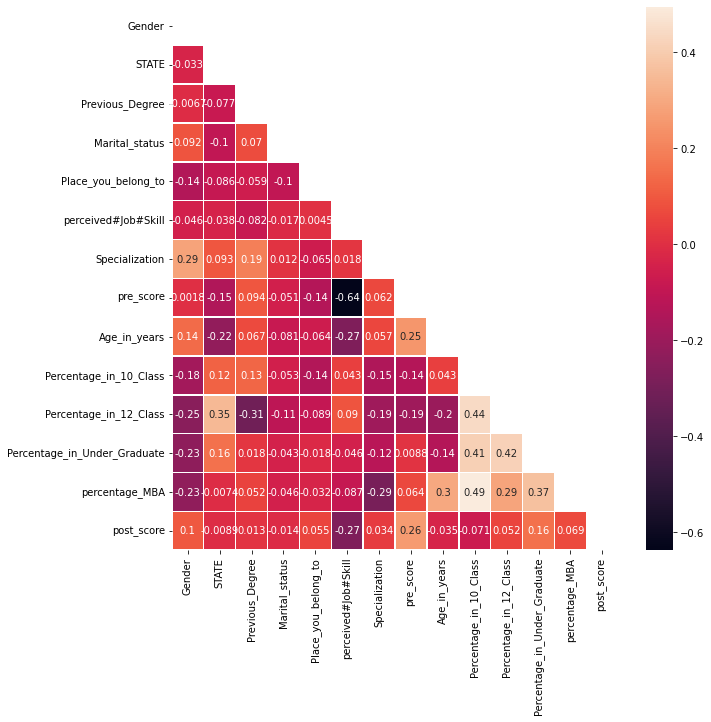

In [ ]:
corr = np.corrcoef(train_data.corr())                        
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True,mask=mask,linewidths=.5,ax=ax)

This is a dataset of MBA admissions. Here through various graphs we are trying to infer the  various characteristics such as age,gender, background and how they affect the specialization they are choosing. here are few interesting results of them

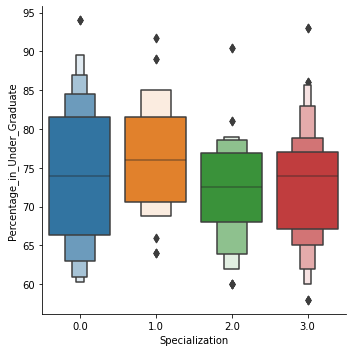

In [ ]:
sns.catplot(x="Specialization", y="Percentage_in_Under_Graduate", kind="boxen", data=train_data)
# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR

From this graph it can be infered that people with higher score in under grad have opted finance as their specialization and overall people in HR is less.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


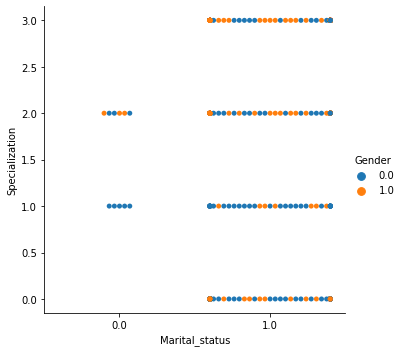

In [ ]:
sns.catplot(x="Marital_status", y="Specialization", hue="Gender", kind="swarm", data=train_data)
#Marital Status - 1 = Single
#               - 0 = Married
# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR


female percentage is more in HR and all the unmarried people in HR are female only. We see higher percentage of male in marketing. 

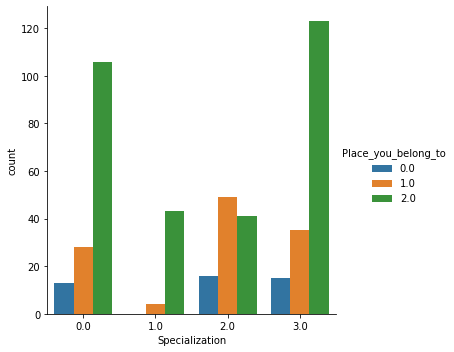

In [ ]:
sns.catplot(x="Specialization",hue = "Place_you_belong_to" ,kind = "count", data=train_data.sort_values("Specialization"))
# 2 - Urban
# 1 - Semi Urban
# 0 - Rural

# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR

There is no one from rural background in HR. There is high difference in no.of people from urban and other sectors in MBA 

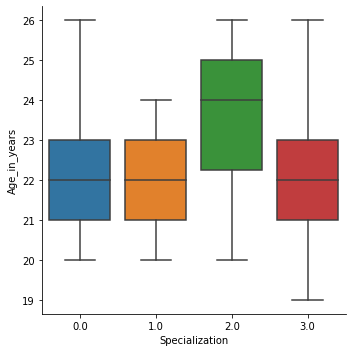

In [ ]:
sns.catplot(x="Specialization", y="Age_in_years", kind="box", data=train_data)
# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR

Elder people are in LOS. There is a wide range in marketing. Both the people who pursue finance, HR and merketing are of almost the same age group

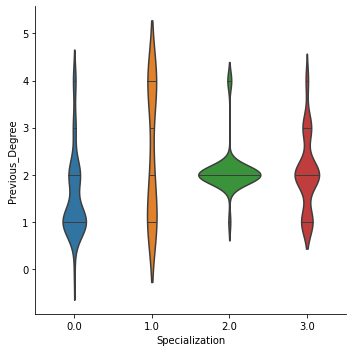

In [ ]:
sns.catplot(x="Specialization", y="Previous_Degree", kind="violin", inner="stick",  data=train_data)
#2,1,3,4,0 = 'Engineering', 'Commerce', 'Management', 'Science', 'Arts'

# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR

There are more no.of people in finance from commerce, LOS from engineering. there is no one into marketing or LOS from arts

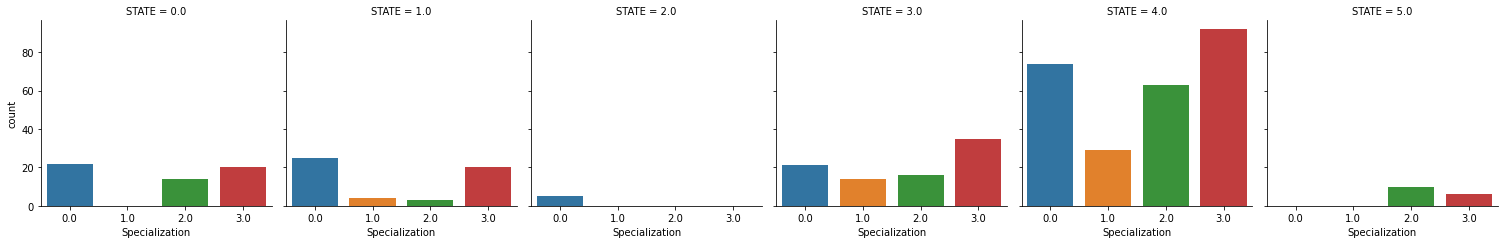

In [ ]:
g = sns.catplot(x="Specialization", col="STATE",
                data=train_data[train_data.STATE.notnull()],                     
                kind="count", height=3.5)
# 0 - Central # 1 - East # 2 - North East
# 3 - North # 4 - Soth # 5 - West

# 0 - Finance
# 3 - Marketing
# 2 - LOS
# 1 - HR

This must be a college located in south and most of the people studying here are from south followed by north. 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#importing f1_score,accuracy_score,confusion_matrix from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X = train_data[["Gender", "Age_in_years", "Marital_status", "Place_you_belong_to", "Previous_Degree", "Percentage_in_Under_Graduate","STATE"]]
Y = train_data[["Specialization"]]
X = X.values
Y = Y.values
#print(type(X),type(Y))
X, test_X, Y, test_Y = train_test_split(X, Y, test_size=0.1, random_state=42)


kNN implemented from scratch

In [ ]:
def eucledian(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist

def get_neighbours(train,trainY,test_row,k):
  dist = list()
  for i in range (train.shape[0]):
    d= eucledian(train[i],test_row)
    #print(d)
    dist.append((train[i],d,trainY[i]))
  #print(dist)
  dist.sort(key=lambda tup:tup[1])
  neighbors = list()
  for i in range(k):
    neighbors.append(dist[i][2])
  #print(neighbors)
  return neighbors,dist

def predict_classification(train,trainY,test_row,k):
  nbrs,dist = get_neighbours(train,trainY,test_row,k)
  prediction = max(nbrs,key = nbrs.count)
  return prediction

In [ ]:

def run_model(X_train,y_train,X_test,y_test):
  preds = []
  accs=[]
  ks = [3,5,7,9]
  for k in ks:
    acc = 0
    for i in range(X_test.shape[0]):
      #print(i,X_test[i])
      prediction = predict_classification(X_train,y_train,X_test[i],k)
      act_y = y_test[i]
      #print(prediction,act_y)
      preds.append(prediction)
      acc += (act_y == prediction)
    accuracy = acc/X_test.shape[0]
    accs.append(accuracy)
    print(accuracy)
    #print(confusion_matrix(y_test, preds))
  print(accs)
  plt.plot(ks,accs)
  


Training

for fold  1
[0.84705882]
[0.77647059]
[0.76470588]
[0.70588235]
[array([0.84705882]), array([0.77647059]), array([0.76470588]), array([0.70588235])]
for fold  2
[0.81176471]
[0.75294118]
[0.71764706]
[0.65882353]
[array([0.81176471]), array([0.75294118]), array([0.71764706]), array([0.65882353])]
for fold  3
[0.72941176]
[0.64705882]
[0.6]
[0.55294118]
[array([0.72941176]), array([0.64705882]), array([0.6]), array([0.55294118])]
for fold  4
[0.70588235]
[0.6]
[0.55294118]
[0.48235294]
[array([0.70588235]), array([0.6]), array([0.55294118]), array([0.48235294])]
for fold  5
[0.72941176]
[0.65882353]
[0.65882353]
[0.6]
[array([0.72941176]), array([0.65882353]), array([0.65882353]), array([0.6])]


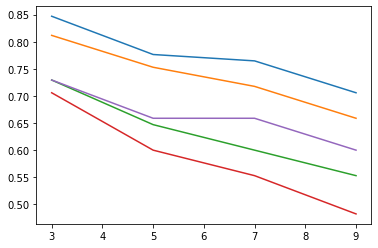

In [ ]:
from sklearn.model_selection import KFold 

kf = KFold(n_splits=5,  random_state=None)                                                 #kfold cross-validation
x = 0
for train_index, test_index in kf.split(X):
  #print("Train:", train_index, "Validation:",test_index)
  x+=1
  print("for fold ",x)
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = Y[train_index], Y[test_index]
  run_model(X_train,y_train,X_test,y_test)
#accrs.append(sum(acs)/len(acs))

#plt.plot(nfold)
  #print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

we observe that the accuracy is decreasing with increase in no.of k

Testing 

In [ ]:
acts = []
k=3
preds=[]
acc=0
for i in range(test_X.shape[0]):
      #print(i,X_test[i])
      prediction = predict_classification(X,Y,test_X[i],k)
      act_y = test_Y[i]
      #print(prediction,act_y)
      acts.append(act_y)
      preds.append(prediction)
      acc += (act_y == prediction)
accuracy = acc/test_X.shape[0]
print(preds)
print(accuracy)
print(confusion_matrix(acts, preds))
print(precision_score(acts,preds,average='weighted'))
print(recall_score(acts,preds,average='weighted'))

[array([0.]), array([1.]), array([1.]), array([0.]), array([3.]), array([0.]), array([3.]), array([3.]), array([0.]), array([3.]), array([2.]), array([0.]), array([3.]), array([3.]), array([3.]), array([3.]), array([2.]), array([2.]), array([3.]), array([0.]), array([3.]), array([3.]), array([0.]), array([0.]), array([0.]), array([0.]), array([3.]), array([0.]), array([0.]), array([3.]), array([0.]), array([2.]), array([0.]), array([0.]), array([2.]), array([1.]), array([3.]), array([2.]), array([3.]), array([3.]), array([0.]), array([3.]), array([0.]), array([2.]), array([3.]), array([3.]), array([3.]), array([3.])]
[0.89583333]
[[16  1  0  0]
 [ 1  0  0  0]
 [ 0  0  7  1]
 [ 0  2  0 20]]
0.9365079365079364
0.8958333333333334


inbuilt kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, Y)
knn_pred = classifier.predict(test_X)
knn_acc = accuracy_score(test_Y,knn_pred)
print(knn_acc)
print(confusion_matrix(test_Y, knn_pred))
print(precision_score(test_Y,knn_pred,average='weighted'))
print(recall_score(test_Y,knn_pred,average='weighted'))

0.7708333333333334
[[10  0  1  6]
 [ 1  0  0  0]
 [ 0  0  7  1]
 [ 2  0  0 20]]
0.7577754036087369
0.7708333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
from sklearn import svm

In [ ]:
rbf_model = svm.SVC(kernel='rbf', gamma=0.5, C = 1.0).fit(X,Y)
rbf_pred = rbf_model.predict(test_X)

rbf_acc = accuracy_score(test_Y,rbf_pred)
rbf_f1 = f1_score(test_Y,rbf_pred, average = "weighted")
print(confusion_matrix(test_Y, rbf_pred))
print(rbf_acc,rbf_f1)
print(precision_score(test_Y,rbf_pred,average='weighted'))
print(recall_score(test_Y,rbf_pred,average='weighted'))

[[17  0  0  0]
 [ 0  1  0  0]
 [ 0  0  7  1]
 [ 0  0  0 22]]
0.9791666666666666 0.9787037037037036
0.9800724637681159
0.9791666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
poly_model = svm.SVC(kernel='poly', gamma=0.3, C = 1, degree=3).fit(X,Y)
poly_pred = poly_model.predict(test_X)

poly_acc = accuracy_score(test_Y,poly_pred)
poly_f1 = f1_score(test_Y,poly_pred, average = "weighted")
print(poly_acc,poly_f1)
print(confusion_matrix(test_Y, poly_pred))
print(precision_score(test_Y,poly_pred,average='weighted'))
print(recall_score(test_Y,poly_pred,average='weighted'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6041666666666666 0.6173558897243108
[[11  2  2  2]
 [ 1  0  0  0]
 [ 0  0  6  2]
 [ 6  1  3 12]]
0.6510942760942761
0.6041666666666666


Logistic Regression implementation

In [ ]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) 

In [ ]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [ ]:
X = pd.DataFrame(X)
print(X.shape[0])
x = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)
print(x.shape[0])

473
473


In [ ]:
Y = pd.DataFrame(Y)
print(len(Y))
y = Y.iloc[:, 0]
y.head()

473


0    3.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

In [ ]:
y.unique()

array([3., 2., 0., 1.])

In [ ]:
y1 = np.zeros([X.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)
y1.head()

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
def gradient_descent(x, y, theta, alpha, epochs):
    m = len(x)
    for i in range(0, epochs):
        for j in range(0, 4):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], x)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*x.iloc[:, k])
            theta = pd.DataFrame(theta)
    return theta

In [ ]:
theta = np.zeros([X.shape[1]+1, y1.shape[1]])
print(theta.shape,x.shape)
theta = gradient_descent(x, y1, theta, 0.05, 2000)
print(theta)

(8, 4) (473, 8)
          0         1          2         3
0  0.447314 -0.479122  -0.047296 -0.068435
1  5.847383  0.344114  -3.493811 -2.949004
2 -0.630922  5.587097  -6.045220 -3.022441
3  1.272007 -1.200567   0.613120 -0.878626
4  2.590753 -6.858764   1.628012  2.887586
5  3.759363  1.481577 -11.109439  3.829235
6  0.900079 -1.531225   1.901041 -0.965749
7  0.632011  4.744113  -9.296108  1.391811


In [ ]:
print(theta.shape)

(8, 4)


In [ ]:
print(x)

     00    0     1    2    3    4      5    6
0     1  1.0  22.0  1.0  2.0  2.0  72.00  0.0
1     1  1.0  25.0  1.0  1.0  2.0  76.90  0.0
2     1  0.0  26.0  1.0  2.0  2.0  77.00  0.0
3     1  1.0  22.0  1.0  1.0  1.0  67.00  0.0
4     1  0.0  24.0  1.0  2.0  2.0  60.33  0.0
..   ..  ...   ...  ...  ...  ...    ...  ...
468   1  1.0  22.0  1.0  2.0  2.0  75.43  0.0
469   1  1.0  25.0  1.0  1.0  2.0  76.90  0.0
470   1  0.0  26.0  1.0  2.0  2.0  77.00  0.0
471   1  1.0  22.0  1.0  1.0  1.0  67.00  0.0
472   1  0.0  24.0  1.0  2.0  2.0  60.33  0.0

[473 rows x 8 columns]


In [ ]:
output = []
for i in range(0, 4):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], x)
    output.append(h)
output=pd.DataFrame(output)

In [ ]:
print(output)

            0             1    ...           471           472
0  1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
1  6.406042e-01  9.999999e-01  ...  9.999988e-01  1.000000e+00
2  1.506773e-08  4.368094e-13  ...  1.471367e-08  6.451950e-22
3  1.164280e-55  6.590992e-63  ...  1.762291e-56  4.132022e-52

[4 rows x 473 columns]


In [ ]:
accuracy = 0
for col in range(0, 4):
    for row in range(len(y1)):
        if y1.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
            accuracy += 1
acc = (accuracy/len(x))
print(acc)

0.6173361522198731


Logistic regression for multiclass inbuilt

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=2000,multi_class='ovr').fit(X, Y)     #multi_class selected to ovr or multinomial lets multiclassification
log_pred = log.predict(test_X)

log_acc = accuracy_score(test_Y,log_pred)
log_f1 = f1_score(test_Y,log_pred,average="weighted")
print(confusion_matrix(test_Y, log_pred))
print(log_acc,log_f1)


[[12  0  3  2]
 [ 0  1  0  0]
 [ 2  0  6  0]
 [ 6  0  2 14]]
0.6875 0.6935455192034139


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
log = LogisticRegression(solver='lbfgs',max_iter=2000,multi_class='multinomial').fit(X, Y)     #multi_class selected to ovr or multinomial lets multiclassification
log_pred1 = log.predict(test_X)

log_acc1 = accuracy_score(test_Y,log_pred1)
log_f11 = f1_score(test_Y,log_pred1,average="weighted")
print(confusion_matrix(test_Y, log_pred1))
print(log_acc1,log_f11)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[12  0  3  2]
 [ 0  1  0  0]
 [ 2  0  6  0]
 [ 6  0  2 14]]
0.6875 0.6935455192034139


**Comparisons**

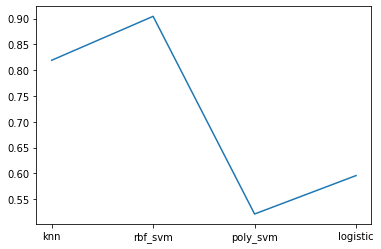

In [ ]:
accuracies_comp = [knn_acc,rbf_acc,poly_acc,log_acc]
algos = ["knn","rbf_svm","poly_svm","logistic"]
plt.plot(algos,accuracies_comp)
